# Model K-prototypes

This Jupyter notebook is used to:

1. Run K-prototypes.
2. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/final.csv


,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,0.54203,0.80258,0.89334,0.00062,0.81895,0.00410,0.00921,0.01021,0.00765,0.00139,...,8094,17,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T19:21:44.529744Z
1,0.54203,0.28579,0.89776,0.03561,0.81945,0.00652,0.01008,0.00737,0.00765,0.00014,...,1341,12,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T19:21:52.456551Z
2,0.54203,0.04745,0.90701,0.02290,0.81980,0.00514,0.00905,0.00794,0.00765,0.00066,...,3866,9,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T19:22:09.06327Z
3,0.54203,1.00000,0.18158,0.00076,0.08164,0.00746,0.01120,0.01475,0.09263,0.00000,...,0,0,udp,dns,S0,orig_reg_or_dyn,resp_reg,No,No,2017-07-07T19:00:26.688648Z
4,0.54203,0.85749,0.89332,0.00002,0.81715,0.00034,0.00064,0.00113,0.00090,0.00002,...,146,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T19:21:44.496311Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,0.00000,0.85749,0.51101,0.00656,0.51243,0.00012,0.00197,0.00454,0.00137,0.00224,...,11847,6,tcp,http,RSTO,orig_reg_or_dyn,resp_80,Yes,Yes,2017-07-07T19:10:18.108585Z
1,0.00000,0.85749,0.32824,0.00626,0.99498,0.00012,0.00219,0.00510,0.00137,0.00224,...,11847,6,tcp,http,RSTO,orig_reg_or_dyn,resp_80,Yes,Yes,2017-07-07T19:04:49.989945Z
2,0.00000,0.85749,0.20572,0.00072,0.90204,0.00012,0.00197,0.00454,0.00137,0.00224,...,11847,6,tcp,http,RSTO,orig_reg_or_dyn,resp_80,Yes,Yes,2017-07-07T19:01:10.022897Z
3,0.54203,0.52624,0.20843,0.01189,0.63235,0.00864,0.01038,0.00510,0.00137,0.00008,...,749,8,tcp,http,SF,orig_reg_or_dyn,resp_80,No,No,2017-07-07T19:01:14.881501Z
4,0.54203,0.85749,0.34489,0.00000,0.99609,0.00038,0.00067,0.00113,0.00090,0.00005,...,314,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T19:05:19.868055Z


## 1. K-prototypes

(https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
)

(https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py)

### Parameters of kmodes.kprototypes.KPrototypes: 

```
num_dissim: 
        Dissimilarity function used by the algorithm for numerical variables. 
        (default is euclidian_dissim)
        
cat_dissim: 
        For categorical variables. 
        (default is matching_dissim)
        
init: 
        Initial centroids.
        
gamma: 
        Weighing factor determining relative importance of numerical vs. categorical attributes. 
        (default is None, calculated from data)
        
n_jobs: 
        Number of jobs to use for the computation - each n_init runs in parallel. If -1 all CPUs are used. 
        (default is 1)
```

### Attributes: 

```
cluster_centroids_

labels_:
        Labels of each point (cluster l affiliation)
        
cost_: 
        Sum distance of all points to their respective cluster centroids.

n_iter_:
        The number of iterations the algorithm ran for.

epoch_costs_:
        Cost at each epoch.

gamma:
        The (potentially calculated) weighing factor.
```

In [4]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 116256 rows and 291 columns


In [7]:
# Inspect the categorical variables
selected_df.select_dtypes('object').nunique()

orig_orig_connection.protocol_mode           3
orig_orig_connection.service_mode            4
orig_orig_connection.conn_state_mode         4
orig_resp_connection.protocol_mode           4
orig_resp_connection.service_mode            5
orig_resp_connection.conn_state_mode         5
resp_orig_connection.protocol_mode           4
resp_orig_connection.service_mode            3
resp_orig_connection.conn_state_mode         4
resp_resp_connection.protocol_mode           3
resp_resp_connection.service_mode            6
resp_resp_connection.conn_state_mode         7
uid                                     116256
originated_ip                               15
responded_ip                              1136
protocol                                     3
service                                     14
conn_state                                   9
orig_p_cat                                   2
resp_p_cat                                   9
attacker_label                               2
victim_label 

In [8]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [9]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [10]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [12]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                        # categorical
                        ['orig_p_cat', 
                         'resp_p_cat',
                         'protocol',
                         'service', 
                         'conn_state'] + 
                        CONN_APP_STATS + 
                        
                        # originator neighbourhood
                        ORIG_ORIG_NUMERICAL_COLS + 
                        ORIG_ORIG_PORTS_COLS + 
                        ORIG_ORIG_APP_STATS_COLS + 
                        ORIG_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        ORIG_RESP_NUMERICAL_COLS + 
                        ORIG_RESP_PORTS_COLS + 
                        ORIG_RESP_APP_STATS_COLS + 
                        ORIG_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_RESP_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_ORIG_NUMERICAL_COLS + 
                        RESP_ORIG_PORTS_COLS + 
                        RESP_ORIG_APP_STATS_COLS + 
                        RESP_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_RESP_NUMERICAL_COLS + 
                        RESP_RESP_PORTS_COLS + 
                        RESP_RESP_APP_STATS_COLS + 
                        RESP_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_RESP_CATEGORICAL_COLS, axis=1)

In [13]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [14]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_http_user_agent_count',
       'resp_resp_similar_ssl_version_count',
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode'],
      dtype='object', length=182)

In [15]:
# Get the position of categorical columns
cat_cols_i_list = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns         : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns indexes : {}'.format(cat_cols_i_list))

Categorical columns         : ['orig_p_cat', 'resp_p_cat', 'protocol', 'service', 'conn_state', 'orig_orig_connection.protocol_mode', 'orig_orig_connection.service_mode', 'orig_orig_connection.conn_state_mode', 'orig_resp_connection.protocol_mode', 'orig_resp_connection.service_mode', 'orig_resp_connection.conn_state_mode', 'resp_orig_connection.protocol_mode', 'resp_orig_connection.service_mode', 'resp_orig_connection.conn_state_mode', 'resp_resp_connection.protocol_mode', 'resp_resp_connection.service_mode', 'resp_resp_connection.conn_state_mode']
Categorical columns indexes : [8, 9, 10, 11, 12, 56, 57, 58, 97, 98, 99, 138, 139, 140, 179, 180, 181]


In [16]:
# Convert dataframe to matrix
df_matrix = df.to_numpy()
df_matrix

array([[0.5110054920143964, 0.0065569003597228, 0.5124296113171269, ...,
        'tcp', 'http', 'RSTO'],
       [0.3282432052000312, 0.0062637167461745, 0.994979322132186, ...,
        'tcp', 'http', 'RSTO'],
       [0.2057214224995212, 0.000717910310236, 0.9020433701109434, ...,
        'tcp', 'http', 'RSTO'],
       ...,
       [0.3405749249503265, 0.0060625957781418, 0.9701506203360346, ...,
        'tcp', 'http', 'RSTO'],
       [0.3677723313435086, 0.0041623555869136, 0.9905538006073648, ...,
        'tcp', 'http', 'RSTO'],
       [0.2454158742062833, 0.0015001020612447, 0.9328236353370264, ...,
        'tcp', 'http', 'RSTO']], dtype=object)

In [17]:
from datetime import datetime

# Choose optimal K using Elbow method
cost = []
print_info = []
computed_clusters = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
#for cluster in range(1, 15):
for cluster in range(1, 8):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        kprototype.fit_predict(X=df_matrix, categorical=cat_cols_i_list)
        computed_clusters.append(kprototype)
        cost.append(kprototype.cost_)
        print_str = 'Cluster initiation: {:2} ({}), gamma: {}'.format(cluster, 
                                                                      datetime.now().strftime("%H:%M:%S"), 
                                                                      kprototype.gamma)
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 01:11:21.
Cluster initiation:  1 (01:12:51), gamma: 0.12959449587371558
Cluster initiation:  2 (01:15:23), gamma: 0.12959449587371558
Cluster initiation:  3 (01:20:30), gamma: 0.12959449587371558
Cluster initiation:  4 (01:25:35), gamma: 0.12959449587371558
Cluster initiation:  5 (01:31:27), gamma: 0.12959449587371558
Cluster initiation:  6 (01:38:42), gamma: 0.12959449587371558
Cluster initiation:  7 (01:49:39), gamma: 0.12959449587371558
Done at 01:49:39.


In [18]:
print_info

['Cluster initiation:  1 (01:12:51), gamma: 0.12959449587371558',
 'Cluster initiation:  2 (01:15:23), gamma: 0.12959449587371558',
 'Cluster initiation:  3 (01:20:30), gamma: 0.12959449587371558',
 'Cluster initiation:  4 (01:25:35), gamma: 0.12959449587371558',
 'Cluster initiation:  5 (01:31:27), gamma: 0.12959449587371558',
 'Cluster initiation:  6 (01:38:42), gamma: 0.12959449587371558',
 'Cluster initiation:  7 (01:49:39), gamma: 0.12959449587371558']

In [19]:
cost

[394758.8696974914,
 172841.68270060825,
 141672.6987611391,
 112775.67883974653,
 95756.26582238077,
 79501.43395219871,
 70747.34014204293]

In [20]:
#df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': cost})

In [21]:
df_cost

,Cluster,Cost
0,1,394758.86970
1,2,172841.68270
2,3,141672.69876
3,4,112775.67884
4,5,95756.26582
5,6,79501.43395
6,7,70747.34014


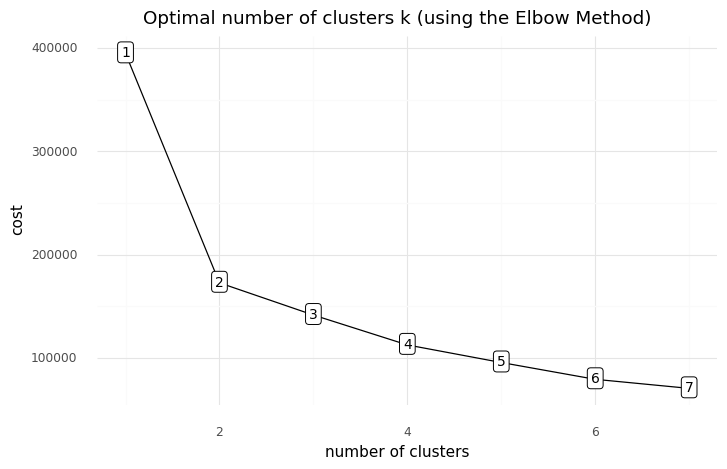

<ggplot: (8758679531030)>

In [22]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [23]:
# Fit the cluster
OPTIMAL_K = 2

kprototype = computed_clusters[OPTIMAL_K]

In [24]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.4593332319649805', '0.0004464024644799138',
        '0.6470809601789141', '0.0006192473415750729',
        '0.0013789191620847744', '0.0014899440508476336',
        '4.354200228431628e-05', '0.0008712155379872784',
        '0.9867513611615245', '0.0', '1.650222608290387e-16', '0.0',
        '1.972697861616464e-05', '0.03006835342118713',
        '0.46117803400692836', '0.1259301530954318',
        '0.1755930590603062', '0.24576178996779344',
        '0.06060462730986659', '0.17968479067185947',
        '0.21998185117969454', '0.029976558616628853',
        '0.4308983666061706', '0.4115245009074203', '0.4560338688686249',
        '0.004659138158129727', '0.1259255898366579',
        '0.27835888770678074', '0.0', '0.25805081669694296',
        '0.23617585251697207', '0.05317604355716836',
        '0.6752156685771351', '0.015655594285323083',
        '0.11664780929287463', '0.16937130039318204',
        '0.28654261750480026', '0.002410390199637052', '0.0', '0.0',
        '0.0',

In [25]:
# Check the iteration of the clusters created
kprototype.n_iter_

4

In [26]:
# Check the cost of the clusters created
kprototype.cost_

141672.6987611391

In [28]:
# Add cluster labels to original dataframe
df['cluster'] = kprototype.labels_
df['cluster_cat'] = df['cluster']

# (groupby works only on category type)
df['cluster_cat'] = df['cluster_cat'].astype('category')

In [29]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [30]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode', 'cluster', 'cluster_cat'],
      dtype='object', length=184)

In [31]:
df['cluster'].value_counts()

1    95804
0    11020
2     9432
Name: cluster, dtype: int64

## 2. Results

In [32]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

,cluster_cat,cluster,protocol,service,conn_state,orig_p_cat,resp_p_cat,connection.time,connection.duration,connection.orig_bytes,connection.orig_pkts,connection.resp_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count
0,0,11020,udp,dns,SF,orig_reg_or_dyn,resp_53,0.45933,0.00045,0.00062,0.00138,0.00004,0.00087,0.98675,0.00000,0.00000,0.00000,0.00002
1,1,95804,tcp,http,RSTO,orig_reg_or_dyn,resp_80,0.38296,0.00517,0.00013,0.00454,0.00224,0.00216,0.00025,0.00048,0.99874,0.00000,0.04342
2,2,9432,tcp,dns,SF,orig_reg_or_dyn,resp_53,0.49305,0.01801,0.00604,0.00660,0.00225,0.00512,0.36790,0.00360,0.20388,0.31192,0.03970


In [33]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_orig_total': 'mean', 
        'orig_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.time_mean': 'mean',
        'orig_orig_connection.duration_mean': 'mean', 
        'orig_orig_connection.orig_bytes_mean': 'mean', 
        'orig_orig_connection.orig_pkts_mean': 'mean',
        'orig_orig_connection.resp_bytes_mean': 'mean',
        'orig_orig_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

,cluster_cat,cluster,orig_orig_total,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean
0,0,11020,0.03007,udp,dns,SF,0.46118,0.12593,0.24576,0.17559,0.06060,0.17968
1,1,95804,0.86682,tcp,http,RSTO,0.37951,0.07297,0.00036,0.19913,0.12796,0.12732
2,2,9432,0.02117,udp,dns,SF,0.49736,0.11227,0.19558,0.14971,0.05857,0.15696


In [34]:
pd.DataFrame(kprototype.cluster_centroids_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
0,0.4593332319649805,0.0004464024644799138,0.6470809601789141,0.0006192473415750729,0.0013789191620847744,0.0014899440508476336,4.354200228431628e-05,0.0008712155379872784,0.9867513611615245,0.0,1.650222608290387e-16,0.0,1.972697861616464e-05,0.03006835342118713,0.46117803400692836,0.1259301530954318,0.1755930590603062,0.24576178996779344,0.06060462730986659,0.17968479067185947,0.21998185117969454,0.029976558616628853,0.4308983666061706,0.4115245009074203,0.4560338688686249,0.004659138158129727,0.1259255898366579,0.27835888770678074,0.0,0.25805081669694296,0.23617585251697207,0.05317604355716836,0.6752156685771351,0.015655594285323083,0.11664780929287463,0.16937130039318204,0.28654261750480026,0.002410390199637052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015287734307581654,0.46135697734776243,0.023373532295275785,0.027610817374261562,0.014264580380740613,0.022683521221874326,0.009008970693145418,0.046098003629764066,0.015270635795933171,0.013650505574280528,0.015789473684210527,1.1889460982587407e-15,0.015257104002236404,-9.469638221383085e-16,0.0,0.0,0.01730859716340546,0.015553539019963059,0.003557168784028985,0.0013019272177518468,0.0046291328034229196,0.021911129680186697,0.0,0.02253235917775179,-3.625351682498753e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7496363265367254,0.4634514743917092,0.0019792837236401834,0.09282856538607928,0.058401502921542524,0.009270033234095788,0.07535599031122535,0.5911222020566198,0.7492524414488747,9.074410163339382e-05,6.04960677555961e-05,0.7491128234671685,0.005241984271022521,0.0005444646097995172,0.005758760295964553,0.0,0.2534093855329036,7.453979777023946e-05,0.0,0.9956241141652343,2.762130219816739e-06,0.006545496557670936,0.003635144088365893,0.005811655051585193,0.01991566136436452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07229398459988738,0.4609238095170084,0.00046910153490041685,0.0024429311638117105,0.0006408137270582404,0.00011013885660783587,0.002806413055605715,0.33057320024201803,0.07215927776500788,0.00036297640653786196,0.00047640653357531763,0.5848684117129777,-1.5934880205023876e-15,0.46163339382938207,1.0804399319160084e-17,0.0,0.47524702561003374,0.029088525912481303,0.1442105263157933,0.9850772031786196,0.0005052325088301543,8.132232536092798e-17,-4.966787215428332e-18,5.536764792617415e-05,0.013048875781407293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,orig_reg_or_dyn,resp_53,udp,dns,SF,udp,dns,SF,-,-,-,udp,dns,SF,udp,dns,SF
1,0.3829573450240566,0.005166639896594608,0.7421597330457884,0.00013329119643746087,0.004540395896674163,0.0014748539432676874,0.00223874567704251,0.0021572705639141417,0.00025051146089933614,0.00048014696672372763,0.998737004717966,0.0,0.04342244038096576,0.8668236168384964,0.37950811185506306,0.07297449156909877,0.19912753419629006,0.00036197317554605347,0.1279618328437774,0.1273153198438378,0.08332637468161928,0.8667840995018193,0.0005688697757922425,0.0004766676408778701,0.0001955441039943288,0.8667718470148005,0.0002766064047430224,0.00023304284561826387,0.0,0.08337063170637704,0.0004013127679538733,0.0001356937079871401,0.0006615481940024199,5.04751010612246e-05,0.9987742899302035,0.00026175210132769154,0.6358060269732632,5.436446634099827e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.110601058947481e-09,0.38372367140192093,4.175191014988934e-05,1.700304033253421e-05,1.02

In [35]:
centroids = pd.DataFrame(kprototype.cluster_centroids_, columns = [CONN_NUMERICAL_COLS + 
                                                                    # categorical
                                                                    ['orig_p_cat', 
                                                                     'resp_p_cat',
                                                                     'protocol',
                                                                     'service', 
                                                                     'conn_state'] + 
                                                                    CONN_APP_STATS + 

                                                                    # originator neighbourhood
                                                                    ORIG_ORIG_NUMERICAL_COLS + 
                                                                    ORIG_ORIG_PORTS_COLS + 
                                                                    ORIG_ORIG_APP_STATS_COLS + 
                                                                    ORIG_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    ORIG_RESP_NUMERICAL_COLS + 
                                                                    ORIG_RESP_PORTS_COLS + 
                                                                    ORIG_RESP_APP_STATS_COLS + 
                                                                    ORIG_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_RESP_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_ORIG_NUMERICAL_COLS + 
                                                                    RESP_ORIG_PORTS_COLS + 
                                                                    RESP_ORIG_APP_STATS_COLS + 
                                                                    RESP_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_RESP_NUMERICAL_COLS + 
                                                                    RESP_RESP_PORTS_COLS + 
                                                                    RESP_RESP_APP_STATS_COLS + 
                                                                    RESP_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_RESP_CATEGORICAL_COLS])

# https://stackoverflow.com/questions/51148457/how-to-find-the-set-of-influential-features-in-clusters/53081779#53081779
centroids

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [36]:
from sklearn.decomposition import PCA

data_num_cols = selected_df.filter(CONN_NUMERICAL_COLS + 
                                   # categorical
                                   OHE_ORIG_P_CAT_COLS + 
                                   OHE_RESP_P_CAT_COLS + 
                                   OHE_PROTO_CAT_COLS + 
                                   OHE_SERVICE_CAT_COLS + 
                                   OHE_CONN_STATE_CAT_COLS + 
                                   
                                   CONN_APP_STATS + 
                                   
                                   # originator neighbourhood
                                   ORIG_ORIG_NUMERICAL_COLS + 
                                   ORIG_ORIG_PORTS_COLS + 
                                   ORIG_ORIG_APP_STATS_COLS + 
                                   ORIG_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   ORIG_RESP_NUMERICAL_COLS + 
                                   ORIG_RESP_PORTS_COLS + 
                                   ORIG_RESP_APP_STATS_COLS + 
                                   ORIG_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_RESP_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_ORIG_NUMERICAL_COLS + 
                                   RESP_ORIG_PORTS_COLS + 
                                   RESP_ORIG_APP_STATS_COLS + 
                                   RESP_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_RESP_NUMERICAL_COLS + 
                                   RESP_RESP_PORTS_COLS + 
                                   RESP_RESP_APP_STATS_COLS + 
                                   RESP_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_RESP_OHE_CAT_COLS, axis=1)
n_components = len(data_num_cols.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [37]:
pca_X = pca.fit_transform(data_num_cols)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 254 principal components: 1.0


In [38]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.96283758]
Variance Captured by First   7 Principal Components: [0.94523356]
Variance Captured by First   5 Principal Components: [0.92465018]
Variance Captured by First   2 Principal Components: [0.85077285]
Variance Captured by the First Principal Component:  [0.75899635]


In [39]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.65447152
Variance of connection.duration                       : 0.10452484
Variance of connection.orig_p                         : 0.04659119
Variance of connection.orig_bytes                     : 0.04518531
Variance of connection.orig_pkts                      : 0.03474128
Variance of connection.resp_p                         : 0.02161779
Variance of connection.resp_bytes                     : 0.01751826
Variance of connection.resp_pkts                      : 0.01242123
Variance of orig_p_cat                                : 0.00816214
Variance of resp_p_cat                                : 0.00690784
Variance of protocol                                  : 0.00590696
Variance of service                                   : 0.00478922
Variance of conn_state                                : 0.00352930
Variance of dns_count                                 : 0.00287996
Variance of ssh_count                                 : 0.0026

In [40]:
pca_X['cluster'] = kprototype.labels_
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,cluster
0,-1.06388,-0.01110,-0.14461,0.37258,0.06727,-0.18299,-0.06476,-0.00095,0.20041,-0.09087,0.23147,-0.11927,-0.02574,0.07829,-0.01043,-0.19428,-0.14431,-0.02902,0.07042,0.09640,-0.01051,-0.05382,-0.01773,0.00618,-0.05279,-0.06442,0.08685,0.03501,-0.03013,0.00471,0.02103,-0.00965,0.00035,-0.00416,-0.00624,0.00410,-0.00740,0.00610,-0.02676,-0.00185,-0.00218,0.01258,0.00745,-0.02163,-0.00478,-0.00176,-0.00544,0.00544,0.00272,0.01423,0.00545,-0.00019,-0.00660,-0.00898,0.00509,-0.00079,0.00363,0.00415,0.00101,0.00256,-0.00215,-0.00094,0.00325,0.00062,-0.00016,0.00084,0.00010,-0.00201,0.00213,0.00122,-0.00189,0.00050,-0.00037,-0.00112,-0.00219,0.00012,-0.00044,0.00129,0.00007,0.00113,0.00138,0.00179,0.00081,-0.00175,-0.00064,0.00091,0.00196,-0.00086,-0.00274,-0.00270,-0.00075,-0.00055,0.00192,-0.00265,0.00036,0.00042,-0.00008,-0.00156,0.00077,0.00196,-0.00067,0.00037,0.00136,0.00024,-0.00003,-0.00019,0.00040,0.00049,-0.00006,-0.00003,0.00034,-0.00001,0.00050,-0.00017,-0.00044,-0.00059,0.00078,-0.00062,0.00011,-0.00015,0.00021,-0.00006,-0.00018,0.00022,0.00066,-0.00044,-0.00039,-0.00002,-0.00062,-0.00064,-0.00029,0.00052,-0.00015,-0.00041,0.00015,0.00005,0.00066,-0.00054,0.00007,0.00003,0.00008,0.00007,0.00013,-0.00002,0.00014,-0.00002,0.00000,-0.00005,0.00000,0.00001,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,1
1,-0.95007,-0.02453,0.57712,-0.57091,0.26917,0.33261,0.04598,-0.07214,-0.19406,-0.02636,-0.07982,0.04864,-0.00936,-0.03573,0.02434,-0.06201,0.03997,0.02420,-0.03370,0.00956,0.04667,-0.02325,0.01124,-0.01905,-0.01402,-0.09565,0.00309,0.09508,-0.03427,-0.00636,-0.03579,0.02387,0.02861,-0.01254,-0.01121,0.00792,0.00060,-0.01078,0.02516,0.02574,0.01305,-0.03598,0.01429,0.02208,0.01734,-0.00046,-0.00130,-0.00812,-0.00200,-0.00486,-0.00420,-0.00757,0.00564,0.00253,0.00255,0.00269,-0.00343,-0.00438,0.00458,-0.00997,-0.00661,-0.00342,-0.00209,-0.00108,0.00203,-0.00069,-0.00488,0.00003,0.00057,0.00471,-0.00217,0.00542,-0.00215,0.00220,0.01020,-0.00050,-0.00349,0.00006,-0.00287,0.00318,0.00085,-0.00305,0.00079,0.00191,0.00022,-0.00018,-0.00077,-0.00035,0.00636,0.00522,0.00032,-0.00001,-0.00713,-0.00054,-0.00254,-0.00006,-0.00092,0.00244,-0.00121,-0.00662,0.00136,-0.00002,-0.00263,0.00126,-0.00017,0.00010,0.00068,-0.00

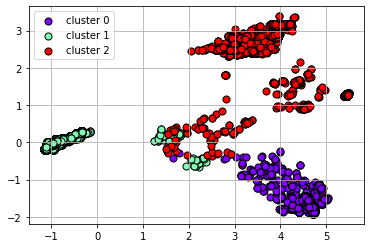

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kprototype.labels_ == i, 0], pca_X_array[kprototype.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [42]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kprototype.labels_ == i, 0], 
                   pca_X_array[kprototype.labels_ == i, 1], 
                   pca_X_array[kprototype.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

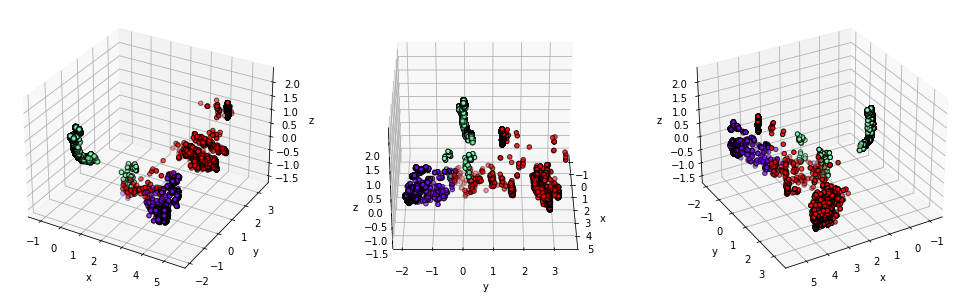

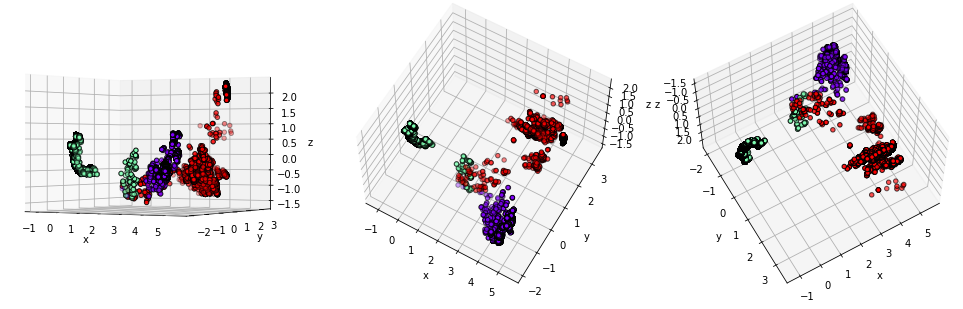

In [43]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [44]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [45]:
# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,cluster,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
0,-1.06388,-0.01110,-0.14461,0.37258,0.06727,-0.18299,-0.06476,-0.00095,0.20041,-0.09087,0.23147,-0.11927,-0.02574,0.07829,-0.01043,-0.19428,-0.14431,-0.02902,0.07042,0.09640,-0.01051,-0.05382,-0.01773,0.00618,-0.05279,-0.06442,0.08685,0.03501,-0.03013,0.00471,0.02103,-0.00965,0.00035,-0.00416,-0.00624,0.00410,-0.00740,0.00610,-0.02676,-0.00185,-0.00218,0.01258,0.00745,-0.02163,-0.00478,-0.00176,-0.00544,0.00544,0.00272,0.01423,0.00545,-0.00019,-0.00660,-0.00898,0.00509,-0.00079,0.00363,0.00415,0.00101,0.00256,-0.00215,-0.00094,0.00325,0.00062,-0.00016,0.00084,0.00010,-0.00201,0.00213,0.00122,-0.00189,0.00050,-0.00037,-0.00112,-0.00219,0.00012,-0.00044,0.00129,0.00007,0.00113,0.00138,0.00179,0.00081,-0.00175,-0.00064,0.00091,0.00196,-0.00086,-0.00274,-0.00270,-0.00075,-0.00055,0.00192,-0.00265,0.00036,0.00042,-0.00008,-0.00156,0.00077,0.00196,-0.00067,0.00037,0.00136,0.00024,-0.00003,-0.00019,0.00040,0.00049,-0.00006,-0.00003,0.00034,-0.00001,0.00050,-0.00017,-0.00044,-0.00059,0.00078,-0.00062,0.00011,-0.00015,0.00021,-0.00006,-0.00018,0.00022,0.00066,-0.00044,-0.00039,-0.00002,-0.00062,-0.00064,-0.00029,0.00052,-0.00015,-0.00041,0.00015,0.00005,0.00066,-0.00054,0.00007,0.00003,0.00008,0.00007,0.00013,-0.00002,0.00014,-0.00002,0.00000,-0.00005,0.00000,0.00001,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,1,CD12k33vF20fNhl6V7,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:10:18.108585Z,0.51101,8.61140,0.00656,tcp,http,RSTO,0.51243,33582,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
1,-0.95007,-0.02453,0.57712,-0.57091,0.26917,0.33261,0.04598,-0.07214,-0.19406,-0.02636,-0.07982,0.04864,-0.00936,-0.03573,0.02434,-0.06201,0.03997,0.02420,-0.03370,0.00956,0.04667,-0.02325,0.01124,-0.01

In [47]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [48]:
plt.rcParams["figure.figsize"] = (10,7)

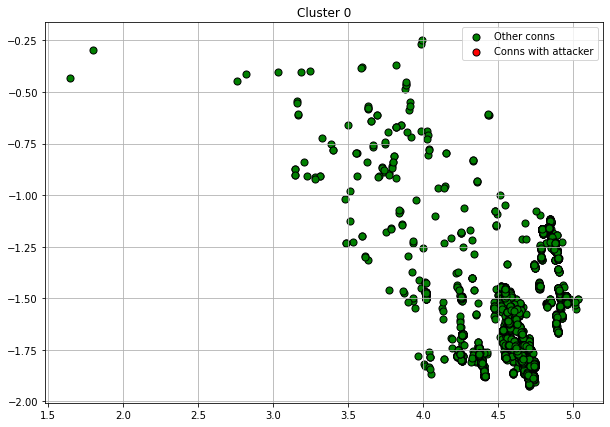

Total num of conns: 11020

Attacker conns ratio:
No     11018
Yes        2
Name: attacker_label, dtype: int64

IPs:
192.168.10.12    4980
192.168.10.15    1463
192.168.10.14     947
192.168.10.16     920
192.168.10.9      888
192.168.10.5      560
192.168.10.17     357
192.168.10.8      330
192.168.10.50     301
192.168.10.19     168
192.168.10.25      80
192.168.10.51      24
172.16.0.1          2
Name: originated_ip, dtype: int64

192.168.10.3     11011
192.168.10.50        7
192.168.10.9         1
192.168.10.14        1
Name: responded_ip, dtype: int64

Cluster 0 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
51221,0.54203,192.168.10.12,0.85749,192.168.10.3,2017-07-07T18:55:11.147206Z,0.00583,0.00019,0.00000,udp,dns,SF,0.37258,24418,orig_reg_or_dyn,0.00039,66,0.00113,2,0.00090,53,resp_53,0.00003,164,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
3705,0.54203,192.168.10.17,0.85749,192.168.10.3,2017-07-07T19:13:13.470214Z,0.60868,0.00025,0.00000,udp,dns,SF,0.89391,58580,orig_reg_or_dyn,0.00055,94,0.00113,2,0.00090,53,resp_53,0.00004,230,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
43706,0.54203,192.168.10.12,0.85749,192.168.10.3,2017-07-07T19:07:22.159552Z,0.41300,0.00021,0.00000,udp,dns,SF,0.75399,49411,orig_reg_or_dyn,0.00038,64,0.00113,2,0.00090,53,resp_53,0.00004,204,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
91862,0.54203,192.168.10.14,0.85749,192.168.10.3,2017-07-07T19:09:32.32582Z,0.48550,0.00019,0.00000,udp,dns,SF,0.89797,58846,orig_reg_or_dyn,0.00045,76,0.00113,2,0.00090,53,resp_53,0.00006,332,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
81919,0.54203,192.168.10.9,0.85749,192.168.10.3,2017-07-07T19:05:01.103429Z,0.33443,34.05792,0.02593,tcp,dce_rpc,SF,0.14510,9511,orig_reg_or_dyn,0.01535,2619,0.01134,20,0.85957,49666,resp_dyn,0.00021,1081,0.00716,18,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
41471,0.54203,192.168.10.12,0.85749,192.168.10.3,2017-07-07T19:07:22.090616Z,0.41296,0.00025,0.00000,udp,dns,SF,0.21250,13928,orig_reg_or_dyn,0.00038,64,0.00113,2,0.00090,53,resp_53,0.00005,258,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
44834,0.54203,192.168.10.14,0.85749,192.168.10.3,2017-07-07T19:04:56.415011Z,0.33182,0.02433,0.00002,udp,dns,SF,0.99936,65490,orig_reg_or_dyn,0.00041,70,0.00113,2,0.00090,53,resp_53,0.00005,234,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
20795,0.54203,192.168.10.16,0.85749,192.168.10.3,2017-07-07T19:13:46.494921Z,0.62708,0.06146,0.00005,udp,dns,SF,0.47399,31063,orig_reg_or_dyn,0.00040,68,0.00113,2,0.00090,53,resp_53,0.00004,220,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
88518,0.54203,192.168.10.17,0.85749,192.168.10.3,2017-07-07T19:13:13.987462Z,0.60897,0.12230,0.00009,udp,dns,SF,0.76710,50270,orig_reg_or_dyn,0.00045,76,0.00113,2,0.00090,53,resp_53,0.00003,170,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
105565,0.54203,192.168.10.9,0.85749,192.168.10.3,2017-07-07T19:23:54.269541Z,0.96561,0.02461,0.00002,udp,dns,SF,0.78866,51683,orig_reg_or_dyn,0.00045,76,0.00113,2,0.00090,53,resp_53,0.00004,206,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp     10943
tcp        75
icmp        2
Name: protocol, dtype: int64

Service:
dns                10883
none                  71
krb                   19
ntp                   16
krb,gssapi,smb        10
dce_rpc               10
krb_tcp                9
ntlm,gssapi,smb        2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    10984
orig_well_known       36
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            10863
resp_well_known      119
resp_123              16
resp_reg              16
resp_dyn               6
Name: resp_p_cat, dtype: int64




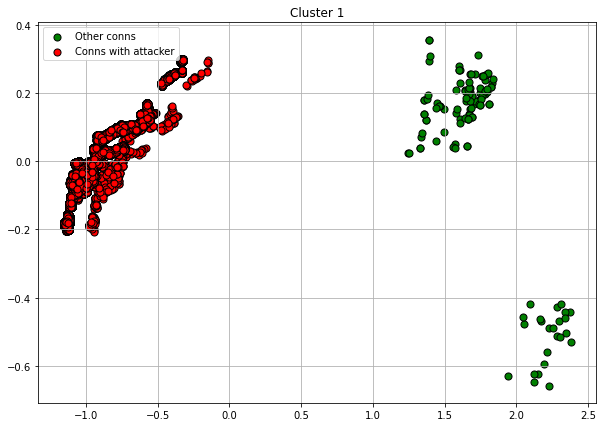

Total num of conns: 95804

Attacker conns ratio:
Yes    95683
No       121
Name: attacker_label, dtype: int64

IPs:
172.16.0.1       95683
192.168.10.25       20
192.168.10.16       16
192.168.10.8        14
192.168.10.17       13
192.168.10.12       13
192.168.10.5        10
192.168.10.15       10
192.168.10.14       10
192.168.10.9         8
192.168.10.19        7
Name: originated_ip, dtype: int64

192.168.10.50    95804
Name: responded_ip, dtype: int64

Cluster 1 NOK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
45673,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:04:44.192631Z,0.32501,11.81762,0.00900,tcp,http,RSTO,0.95864,62822,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00199,5,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
61507,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:03:33.676685Z,0.28574,11.94662,0.00910,tcp,http,RSTO,0.92986,60936,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
6252,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T18:59:00.38844Z,0.13351,8.64977,0.00659,tcp,http,RSTO,0.81677,53525,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
94288,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:10:27.73406Z,0.51637,10.69554,0.00814,tcp,http,RSTO,0.51679,33868,orig_reg_or_dyn,0.00012,20,0.00510,9,0.00137,80,resp_80,0.00224,11595,0.00199,5,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
85438,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:00:27.0716Z,0.18180,5.51226,0.00420,tcp,http,RSTO,0.30034,19684,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
8568,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:04:27.55847Z,0.31575,2.93460,0.00223,tcp,http,RSTO,0.94811,62132,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00318,8,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
42121,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:01:34.946Z,0.21960,12.13168,0.00924,tcp,http,RSTO,0.87993,57664,orig_reg_or_dyn,0.00012,20,0.00397,7,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
65436,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:11:42.5978Z,0.55807,5.90187,0.00449,tcp,http,RSTO,0.92069,60335,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00239,6,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
84687,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:02:11.241115Z,0.23982,12.01256,0.00915,tcp,http,RSTO,0.92867,60858,orig_reg_or_dyn,0.00012,20,0.00510,9,0.00137,80,resp_80,0.00224,11595,0.00159,4,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes
91329,0.00000,172.16.0.1,0.85749,192.168.10.50,2017-07-07T19:08:46.72424Z,0.46010,6.06137,0.00462,tcp,http,RSTO,0.80914,53025,orig_reg_or_dyn,0.00012,20,0.00454,8,0.00137,80,resp_80,0.00224,11595,0.00199,5,0.00000,0.00000,1.00000,0.00000,0.04348,Yes,Yes


Cluster 1 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
15973,0.54203,192.168.10.19,0.85749,192.168.10.50,2017-07-07T19:11:59.26676Z,0.56735,1.32681,0.00101,tcp,ssh,SF,0.55784,36558,orig_reg_or_dyn,0.00780,1332,0.02496,44,0.00036,22,resp_22,0.00067,3477,0.01829,46,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
111959,0.54203,192.168.10.25,0.85749,192.168.10.50,2017-07-07T19:10:23.360675Z,0.51393,0.00005,0.00000,udp,dns,SHR,0.75357,49384,orig_reg_or_dyn,0.00000,0,0.00000,0,0.00235,137,resp_well_known,0.00002,124,0.00080,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
3282,0.54203,192.168.10.16,0.85749,192.168.10.50,2017-07-07T19:10:56.320353Z,0.53229,1.41525,0.00108,tcp,ssh,SF,0.61538,40328,orig_reg_or_dyn,0.00780,1332,0.02496,44,0.00036,22,resp_22,0.00067,3477,0.01829,46,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
72828,0.54203,192.168.10.5,0.85749,192.168.10.50,2017-07-07T18:59:22.163763Z,0.14564,0.02224,0.00002,tcp,ftp-data,SF,0.85587,56087,orig_reg_or_dyn,0.06010,10257,0.01021,18,0.54733,31625,resp_reg,0.00000,0,0.00477,12,0.00000,0.00000,0.00000,0.00000,0.04348,No,Yes
81139,0.54203,192.168.10.9,0.85749,192.168.10.50,2017-07-07T18:59:54.564016Z,0.16369,0.03197,0.00002,tcp,ftp-data,SF,0.14482,9493,orig_reg_or_dyn,0.06010,10257,0.01078,19,0.74605,43107,resp_reg,0.00000,0,0.00398,10,0.00000,0.00000,0.00000,0.00000,0.04348,No,Yes
97185,0.54203,192.168.10.5,0.85749,192.168.10.50,2017-07-07T19:14:16.101857Z,0.64357,1.29609,0.00099,tcp,ssh,SF,0.85713,56170,orig_reg_or_dyn,0.00752,1284,0.02155,38,0.00036,22,resp_22,0.00067,3477,0.01750,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
68566,0.54203,192.168.10.17,0.85749,192.168.10.50,2017-07-07T19:00:52.510472Z,0.19597,0.00000,0.00000,udp,dns,SF,0.00204,137,orig_well_known,0.00036,62,0.00057,1,0.00235,137,resp_well_known,0.00001,62,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
40757,0.54203,192.168.10.15,0.85749,192.168.10.50,2017-07-07T19:04:38.015071Z,0.32157,1.43520,0.00109,tcp,ssh,SF,0.90183,59099,orig_reg_or_dyn,0.00752,1284,0.02382,42,0.00036,22,resp_22,0.00067,3477,0.01909,48,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
15958,0.54203,192.168.10.25,0.85749,192.168.10.50,2017-07-07T19:13:07.815126Z,0.60553,0.00005,0.00000,udp,dns,SF,0.00204,137,orig_well_known,0.00036,62,0.00057,1,0.00235,137,resp_well_known,0.00001,62,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
8317,0.54203,192.168.10.12,0.85749,192.168.10.50,2017-07-07T19:04:08.213614Z,0.30497,1.25630,0.00096,tcp,ssh,SF,0.63934,41898,orig_reg_or_dyn,0.00780,1332,0.02382,42,0.00036,22,resp_22,0.00067,3477,0.01670,42,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes


Protocol:
tcp    95780
udp       24
Name: protocol, dtype: int64

Service:
http                  95134
none                    556
ssh                      46
dns                      24
ftp-data                 19
ftp                      19
dce_rpc,gssapi,smb        6
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    95786
orig_well_known       18
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            95683
resp_22               46
resp_well_known       37
resp_21               19
resp_reg              17
resp_dyn               2
Name: resp_p_cat, dtype: int64




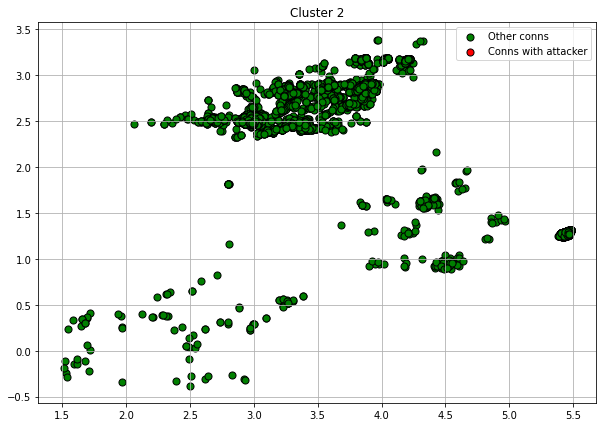

Total num of conns: 9432

Attacker conns ratio:
No     9409
Yes      23
Name: attacker_label, dtype: int64

IPs:
192.168.10.3     3424
192.168.10.15    1304
192.168.10.12    1189
192.168.10.16     878
192.168.10.14     639
192.168.10.9      593
192.168.10.5      406
192.168.10.8      338
192.168.10.17     328
192.168.10.25     142
192.168.10.19      94
192.168.10.51      61
172.16.0.1         23
192.168.10.50      12
210.14.132.70       1
Name: originated_ip, dtype: int64

192.168.10.1      3397
61.251.165.12      531
205.174.165.73     320
23.111.11.111      155
119.205.194.11     130
                  ... 
54.219.148.161       1
52.84.145.162        1
156.154.200.32       1
35.185.125.238       1
129.146.12.99        1
Name: responded_ip, Length: 1135, dtype: int64

Cluster 2 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
105061,0.54203,192.168.10.12,0.04518,14.0.70.137,2017-07-07T19:01:15.671986Z,0.20887,12.96329,0.00987,tcp,http,SF,0.54103,35456,orig_reg_or_dyn,0.08804,15026,0.01985,35,0.00137,80,resp_80,0.00135,6980,0.02147,54,0.00000,0.00000,1.00000,0.00000,0.00000,No,No
101361,0.54203,192.168.10.3,0.85749,192.168.10.1,2017-07-07T19:13:55.626451Z,0.63216,0.07278,0.00006,udp,dns,SF,0.93176,61060,orig_reg_or_dyn,0.00028,47,0.00057,1,0.00090,53,resp_53,0.00005,242,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
114216,0.54203,192.168.10.3,0.85749,192.168.10.1,2017-07-07T19:08:25.462028Z,0.44826,0.02339,0.00002,udp,dns,SF,0.93516,61283,orig_reg_or_dyn,0.00033,56,0.00057,1,0.00090,53,resp_53,0.00002,120,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
106072,0.54203,192.168.10.15,0.08807,23.111.11.111,2017-07-07T19:12:42.825934Z,0.59161,5.08201,0.00387,tcp,ssl,SF,0.90711,59445,orig_reg_or_dyn,0.00351,599,0.00397,7,0.00765,443,resp_443,0.00003,152,0.00239,6,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
3506,0.54203,192.168.10.3,0.85749,192.168.10.1,2017-07-07T19:07:20.579248Z,0.41212,0.04986,0.00004,udp,dns,SF,0.92644,60712,orig_reg_or_dyn,0.00030,52,0.00057,1,0.00090,53,resp_53,0.00002,84,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
17862,0.54203,192.168.10.15,0.08807,23.111.11.111,2017-07-07T19:13:52.583894Z,0.63047,5.54229,0.00422,tcp,ssl,SF,0.90815,59513,orig_reg_or_dyn,0.00395,674,0.00567,10,0.00765,443,resp_443,0.00116,6014,0.00318,8,0.00000,0.00000,0.00000,1.00000,0.17391,No,No
111054,0.54203,192.168.10.3,0.85749,192.168.10.1,2017-07-07T18:58:38.242849Z,0.12118,0.04820,0.00004,udp,dns,SF,0.94634,62016,orig_reg_or_dyn,0.00029,50,0.00057,1,0.00090,53,resp_53,0.00003,171,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
111452,0.54203,192.168.10.9,0.76742,172.217.10.238,2017-07-07T18:55:51.849902Z,0.02850,63.63352,0.04845,tcp,none,SF,0.14330,9393,orig_reg_or_dyn,0.00099,169,0.00454,8,0.00765,443,resp_443,0.00002,92,0.00159,4,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
43127,0.54203,192.168.10.3,0.85749,192.168.10.1,2017-07-07T18:57:11.205267Z,0.07270,0.06167,0.00005,udp,dns,SF,0.93136,61034,orig_reg_or_dyn,0.00028,48,0.00057,1,0.00090,53,resp_53,0.00002,87,0.00040,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
28787,0.54203,192.168.10.15,0.76742,172.217.10.4,2017-07-07T19:11:20.099321Z,0.54553,115.32583,0.08781,tcp,http,SF,0.90424,59257,orig_reg_or_dyn,0.00338,576,0.00964,17,0.00137,80,resp_80,0.00005,250,0.00596,15,0.00000,0.00000,1.00000,0.00000,0.00000,No,No


Protocol:
tcp     5809
udp     3599
icmp      24
Name: protocol, dtype: int64

Service:
dns                   3470
ssl                   2942
http                  1910
none                   942
ntp                    110
ssh                     34
ftp                     10
ftp-data                10
dce_rpc,gssapi,smb       4
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    9229
orig_well_known     203
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            3397
resp_443           2986
resp_80            2402
resp_reg            338
resp_well_known     152
resp_123            110
resp_22              34
resp_21              10
resp_dyn              3
Name: resp_p_cat, dtype: int64




In [49]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
        
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Interpretation

Parallel coordinates plots.

In [50]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

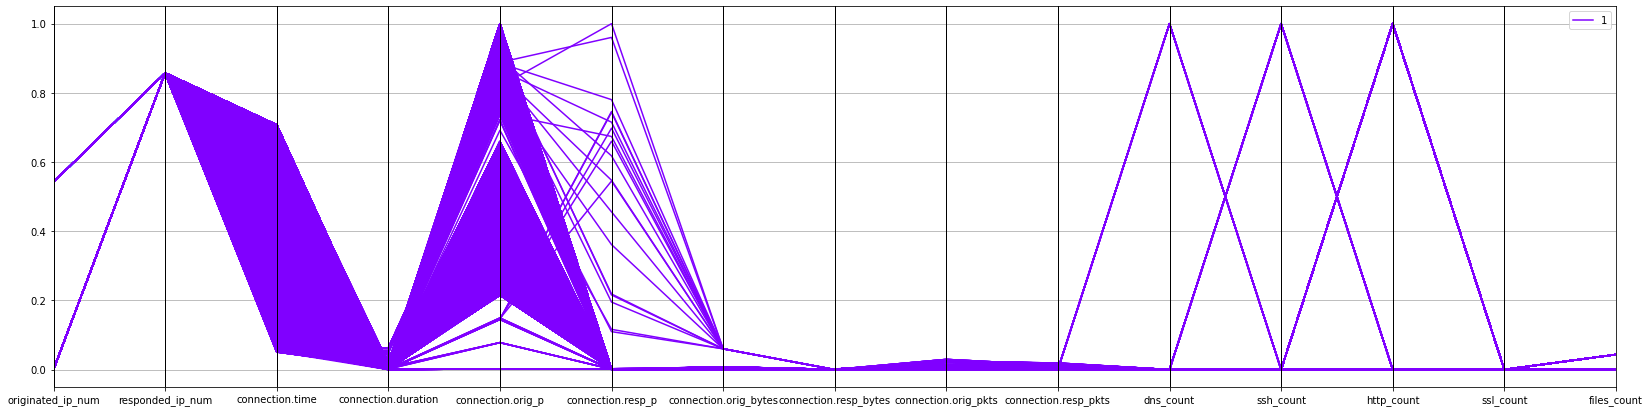

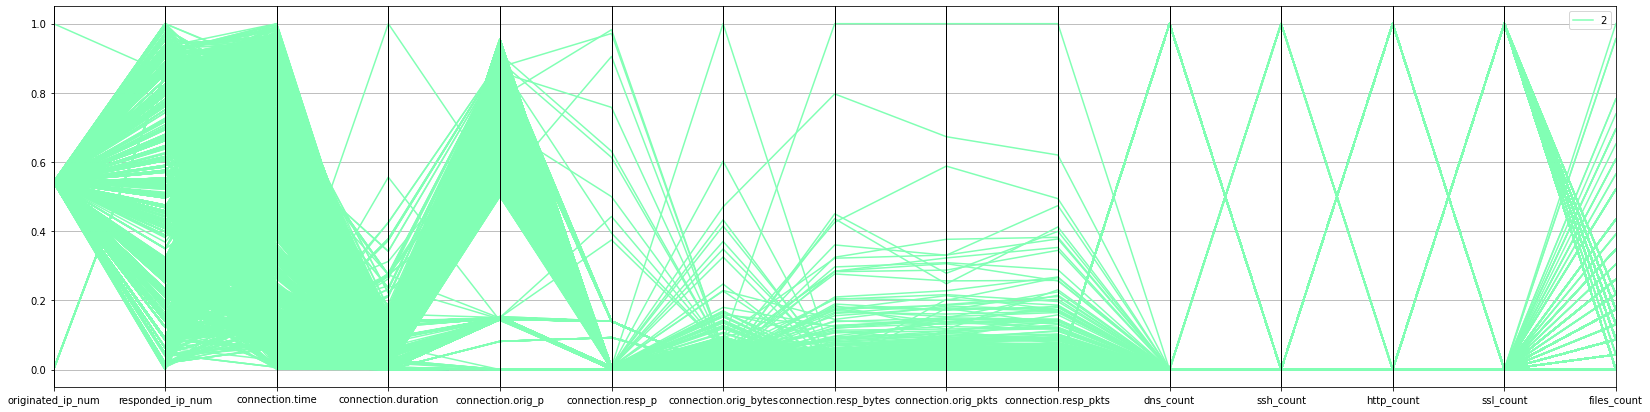

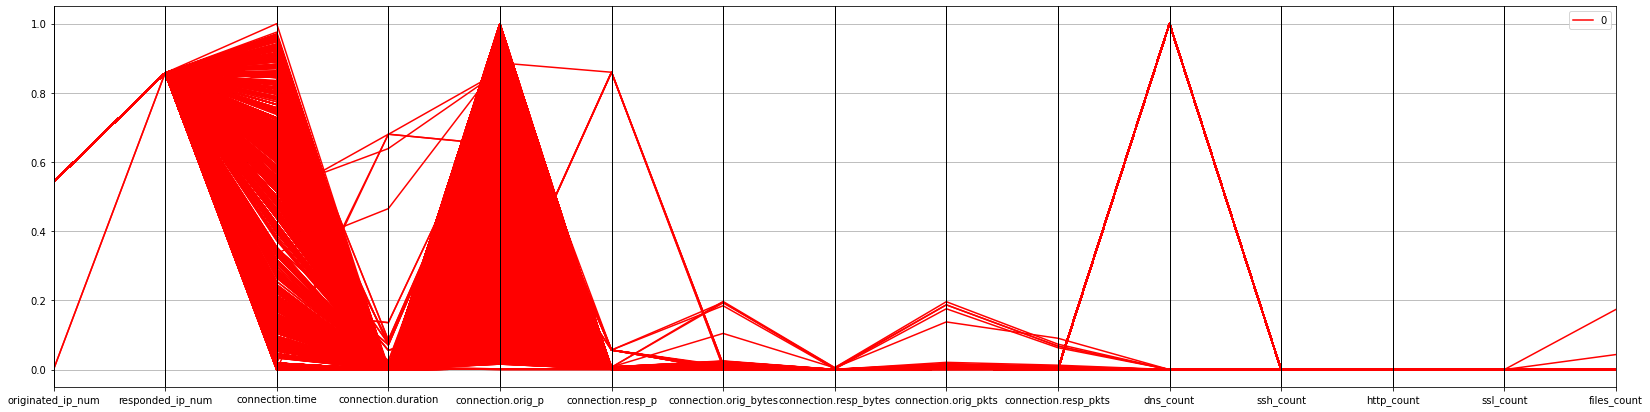

In [51]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

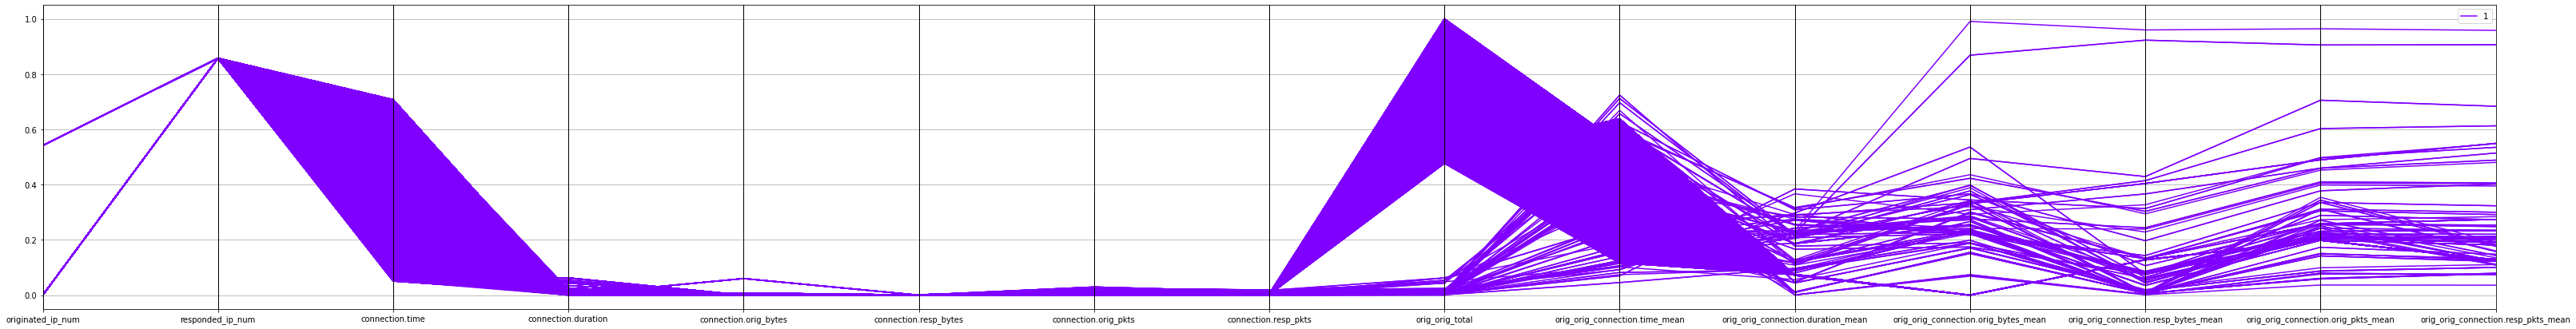

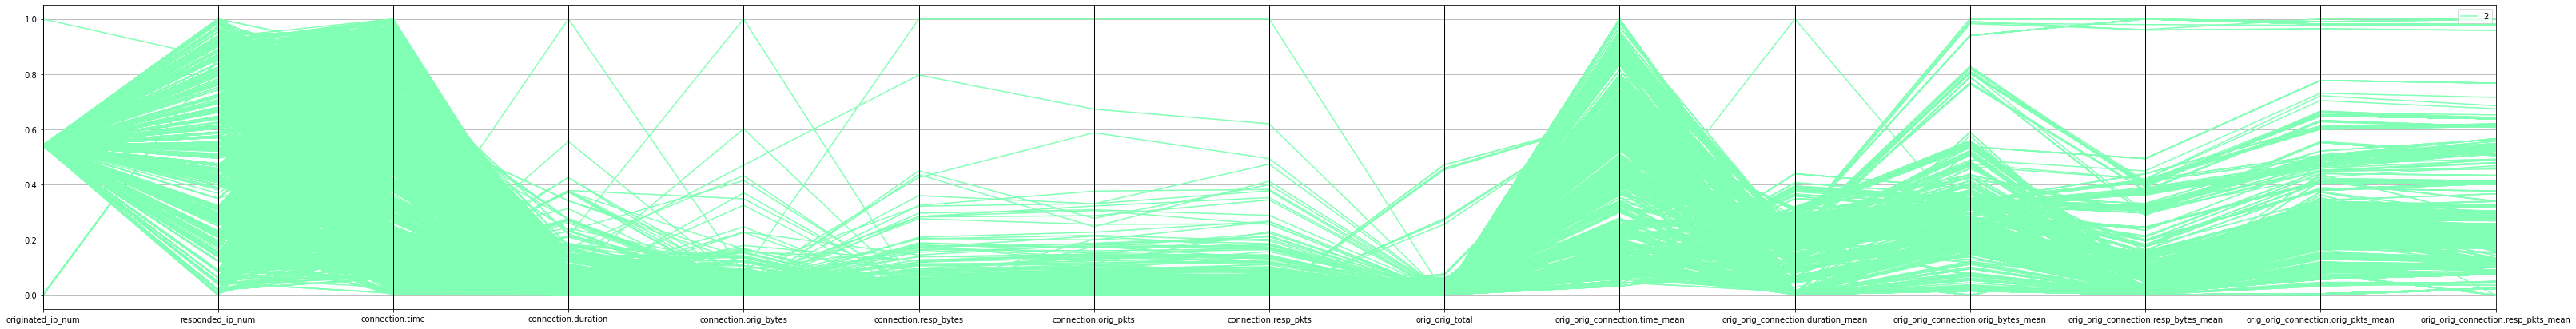

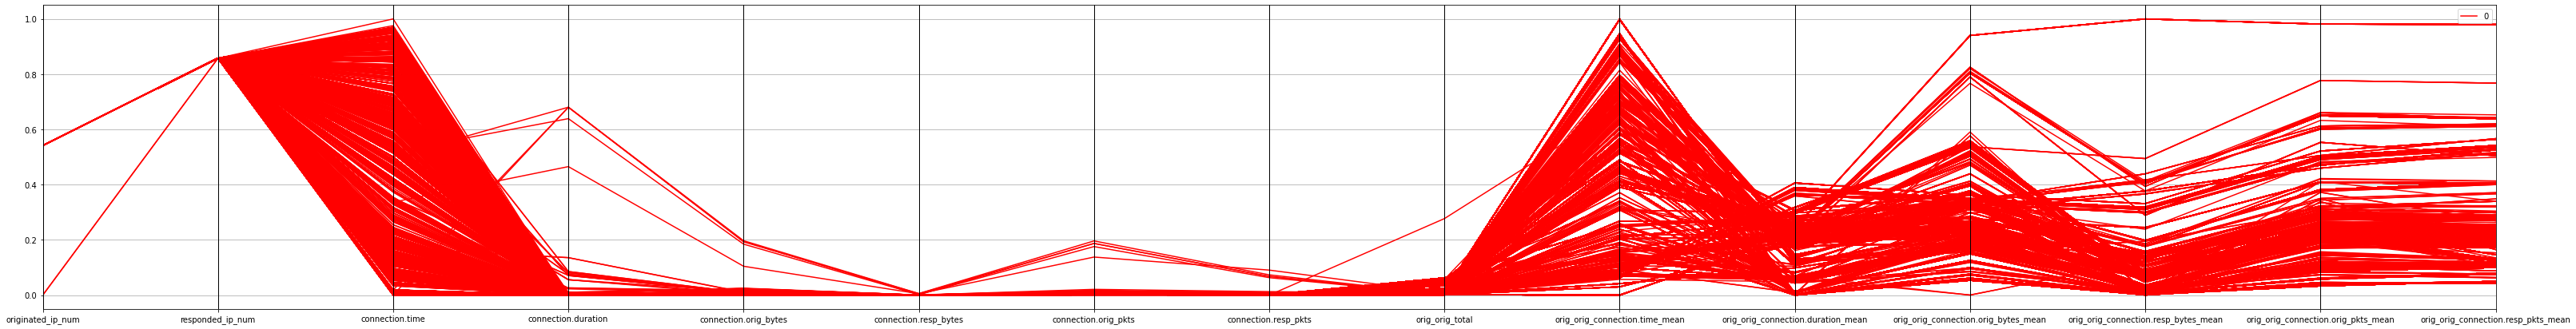

In [52]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()